In [1]:
from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

In [2]:
data = compile_team_tracking_data("data/H_EURO2020", "DEN")
df = extract_one_match(data,1)


In [3]:
msds = team_msd_for_dataframe(df, data.iloc[::240].index, 240)

   Time [s]  frame_team  Time [s]_team half_team  home_1_x  home_1_y  \
0      0.00           0           0.00        1H     52.49     -0.08   
1      0.04           1           0.04        1H     52.51     -0.06   
2      0.08           2           0.08        1H     52.53     -0.05   
3      0.12           3           0.12        1H     52.51     -0.06   
4      0.16           4           0.16        1H     52.51     -0.05   

   home_3_x  home_3_y  home_4_x  home_4_y  ...  away_16_y  away_17_x  \
0     19.96      0.13     21.84     10.54  ...      -0.28      -0.42   
1     19.95      0.14     21.87     10.56  ...      -0.29      -0.41   
2     19.95      0.15     21.89     10.57  ...      -0.30      -0.39   
3     19.94      0.16     21.90     10.58  ...      -0.30      -0.37   
4     19.94      0.17     21.92     10.59  ...      -0.32      -0.33   

   away_17_y  away_22_x  away_22_y  away_23_x  away_23_y  ball_x  ball_y  \
0      17.42      -0.41      28.75      -0.43      33.28  

In [5]:
msd_PCA = PCAObject(msds)
transformed_msds = msd_PCA.transform(msds)


here


In [ ]:
msd_AutoEncoder = AutoEncoderObject(msds)
transformed_msds = msd_AutoEncoder.transform(msds)

In [15]:
clustering_obj = KMeansObject(transformed_msds, 4)
labels = clustering_obj.get_labels()

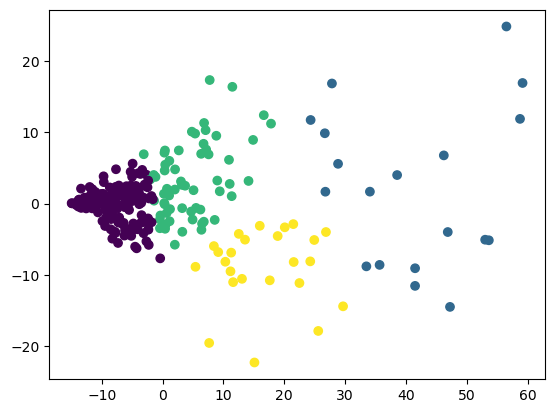

In [16]:
plt.scatter(transformed_msds[:,0], transformed_msds[:,1], c = labels)

In [27]:
from sklearn.neighbors import KDTree

# Step 1: Build a KDTree from the PCA-reduced real match data
tree = KDTree(transformed_msds)

# Step 2: Query the 10 nearest neighbors for the clicked situation
distances, indices = tree.query(transformed_msds[150].reshape(1, -1), k=10)  # Find 10 nearest neighbors

# Flatten the indices
closest_indices = indices.flatten()
print("Closest situation indices:", closest_indices)


actual_indices = df.iloc[closest_indices].index



Closest situation indices: [150  45 194  55 284 114  69 267 270  64]


In [28]:
generate_pitches_from_start_indices(actual_indices,df,"msd_tests",12,240)